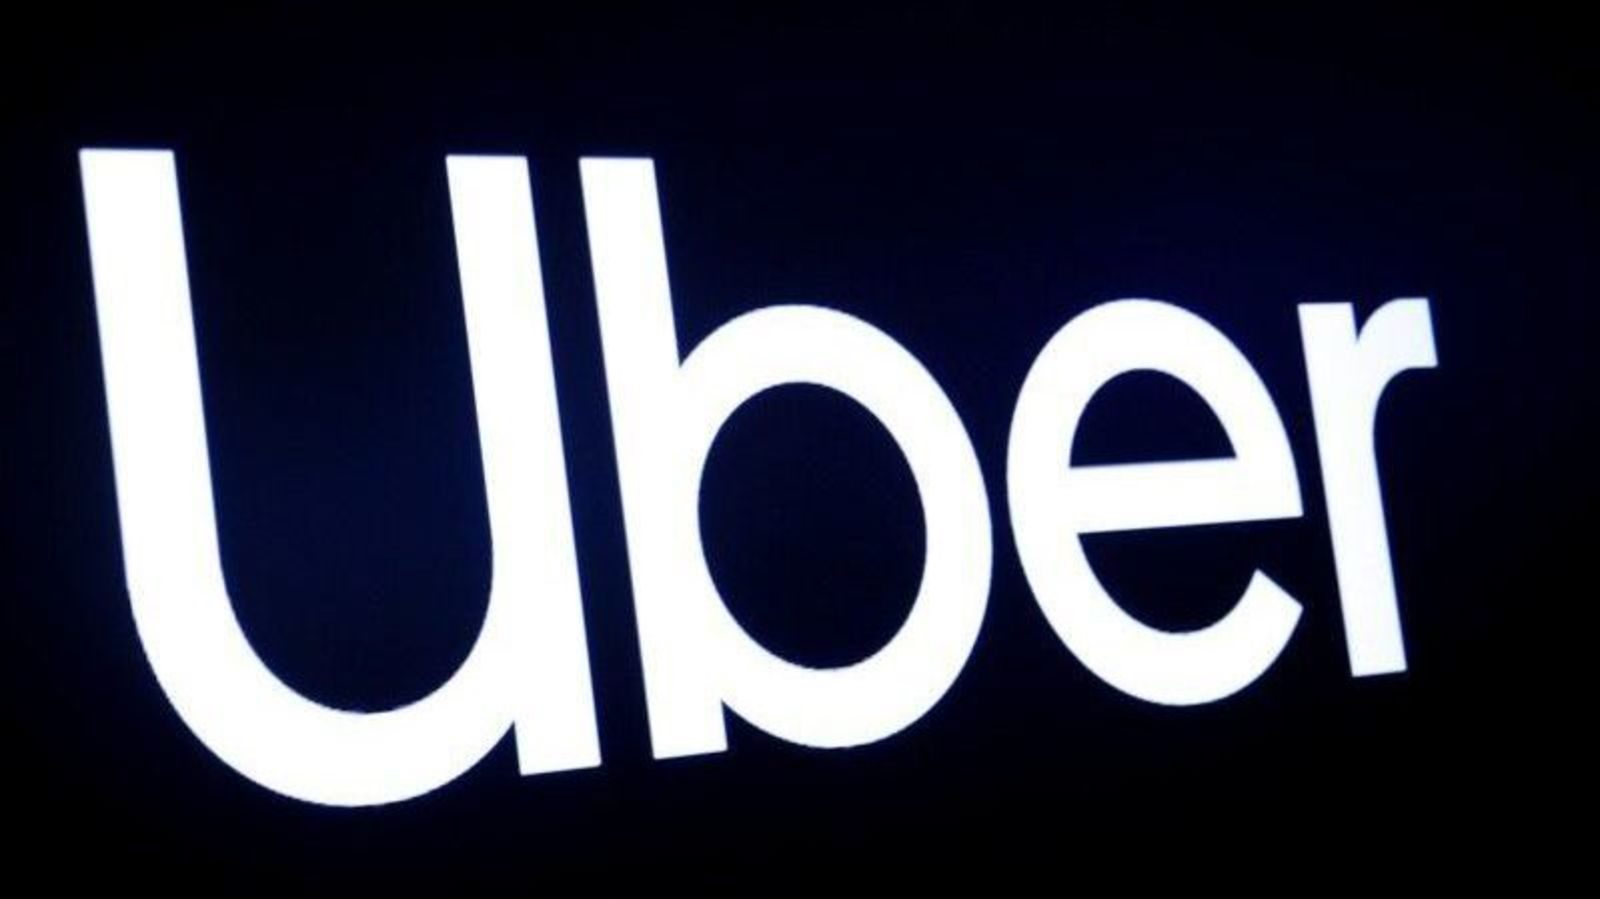

## **Uber**
**Uber Technologies**, Inc., commonly known as Uber, is ans American technology company. Its services include ride-hailing, food deliverly, package delivery, couriers, freight tranportation, and through a partnership with Lime, electric bicycle and motorized scooter rental.

We will explore Uber's data and uncover valuable patterns related to its performance. By analyzing this data, we aim to identify peak times, popular locations, and customer behaviors.
The primary goal of this analysis is to understand & identify trends, and make data-driven recommendations to improve Uber's services.

Data Source: Kaggle 


### **Import Libraries**

In [1]:
import pandas as pd #data manipulation 
import numpy as np #numerical computing
import matplotlib.pyplot as plt # interactive visualizations 
import seaborn as sns #statistical visualization based matplotlib
import calendar #dates and calendars

### **Loading dataset**

In [2]:
df = pd.read_csv("D:/ANP C-8220/Project/Uber Drives.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
print(df.shape)

(1156, 7)


## **Data CLeaning**

### **Missing Value**

In [4]:
# to identify the number of missing (null) values in each column of a DataFrame
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [5]:
# to exactly see Null record in END_DATE* column
df[df['END_DATE'].isna()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [6]:
# dropping row contaning null value for 'END_DATE*' column, by passing it's index

df.drop(df[df['END_DATE'].isna()].index, axis = 0, inplace = True)

In [7]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

### **Handling Missing Value**

In [8]:
# There are a lot of null values in PURPOSE column, so for that we will be filling the null values with a NOT keyword.
df['PURPOSE'].fillna("NOT", inplace=True)

C:\Users\shaik\AppData\Local\Temp\ipykernel_17288\942942041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("NOT", inplace=True)


In [9]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

### **Handling duplicate values**

In [10]:
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [11]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)  # give axis = 1, for removing column
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE


### **Standardize the Data**

In [12]:
df['START'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

In [13]:
# Convert 'START' column to string type
df['START'] = df['START'].astype(str)

# Replace '?' with an empty string
df['START'] = df['START'].str.replace('?', '', regex=False)  #not special char

# Clean any variations or typos in location names
df['START'] = df['START'].replace({
    'Rwalpindi': 'Rawalpindi',
    'Kar?chi': 'Karachi',
    'R?walpindi': 'Rawalpindi',
    'Kar?chi': 'Karachi'
}, regex=False)

# Replace 'Unknown Location' with a placeholder if needed
df['START'] = df['START'].replace('Unknown Location', 'Unknown')

# Print unique values after cleaning
print("\nCleaned unique values in 'START':")

df['START'].unique()


Cleaned unique values in 'START':


array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown', 'Colombo', 'Nugegoda', 'Islamabad',
       'Rawalpindi', 'Noorpur Shahan', 'Heritage Pines', 'Westpark Place',
       'Waverly Place', 'Wayne Ridge', 'Weston', 'East Austin',
       'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Convention Cent

In [14]:
len(df['START'].unique())

176

In [15]:
df['STOP'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Palm Beach', 'Cary',
       'Morrisville', 'New York', 'Queens', 'East Harlem', 'NoMad',
       'Midtown', 'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Queens County', 'Gulfton', 'Downtown',
       'Houston', 'Jamestown Court', 'Durham', 'Whitebridge',
       'Lake Wellingborough', 'Raleigh', 'Umstead', 'Hazelwood',
       'Westpark Place', 'Meredith Townes', 'Leesville Hollow', 'Apex',
       'Chapel Hill', 'Williamsburg Manor', 'Macgregor Downs',
       'Edgehill Farms', 'Northwoods', 'Tanglewood', 'Preston',
       'Walnut Terrace', 'Jackson Heights', 'East Elmhurst',
       'Midtown West', 'Long Island City', 'Jamaica', 'Unknown Location',
       'Colombo', 'Nugegoda', 'Katunayaka', 'Islamabad', 'R?walpindi',
       'Noorpur Shahan', 'Heritage Pines', 'Waverly Place', 'Wayne Ridge',
       'Depot Historic District', 'Weston', 'West University',
       'South Congress', 'Arts District', 'Congress Ave District

In [16]:
# Convert 'START' column to string type
df['STOP'] = df['STOP'].astype(str)

# Replace '?' with an empty string
df['STOP'] = df['STOP'].str.replace('?', '', regex=False)  #not special char

# Clean any variations or typos in location names
df['STOP'] = df['STOP'].replace({
    'R?walpindi': 'Rawalpindi',
    'Kar?chi': 'Karachi',
    'Rwalpindi': 'Rawalpindi',
    'Ilukwatta': 'Ilukwatta',
    'Gulfton': 'Gulfton',
    'NoMad': 'Nomad'
}, regex=False)

# Replace 'Unknown Location' with a placeholder if needed
df['STOP'] = df['STOP'].replace('Unknown Location', 'Unknown')

# Print unique values after cleaning
print("\nCleaned unique values in 'STOP':")
df['STOP'].unique()


Cleaned unique values in 'STOP':


array(['Fort Pierce', 'West Palm Beach', 'Palm Beach', 'Cary',
       'Morrisville', 'New York', 'Queens', 'East Harlem', 'Nomad',
       'Midtown', 'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Queens County', 'Gulfton', 'Downtown',
       'Houston', 'Jamestown Court', 'Durham', 'Whitebridge',
       'Lake Wellingborough', 'Raleigh', 'Umstead', 'Hazelwood',
       'Westpark Place', 'Meredith Townes', 'Leesville Hollow', 'Apex',
       'Chapel Hill', 'Williamsburg Manor', 'Macgregor Downs',
       'Edgehill Farms', 'Northwoods', 'Tanglewood', 'Preston',
       'Walnut Terrace', 'Jackson Heights', 'East Elmhurst',
       'Midtown West', 'Long Island City', 'Jamaica', 'Unknown',
       'Colombo', 'Nugegoda', 'Katunayaka', 'Islamabad', 'Rawalpindi',
       'Noorpur Shahan', 'Heritage Pines', 'Waverly Place', 'Wayne Ridge',
       'Depot Historic District', 'Weston', 'West University',
       'South Congress', 'Arts District', 'Congress Ave District',
      

In [17]:
len(df['STOP'].unique())

187

In [18]:
df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

In [19]:
df['PURPOSE'].unique()

array(['Meal/Entertain', 'NOT', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [20]:
len(df['PURPOSE'].unique())

11

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1154 non-null   object 
 1   END_DATE    1154 non-null   object 
 2   CATEGORY    1154 non-null   object 
 3   START       1154 non-null   object 
 4   STOP        1154 non-null   object 
 5   MILES       1154 non-null   float64
 6   PURPOSE     1154 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


In [22]:
#Converting START_DATE and END_START columns data type to date_time format ('%m/%d%Y %H:%M')

df['START_DATE'] = pd.to_datetime(df['START_DATE'], format = 'mixed')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format = 'mixed')

df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [23]:
df['MILES'].describe() #calculates the descriptive statistics for the "miles" column.

count    1154.000000
mean       10.567418
std        21.588452
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES, dtype: float64

In [24]:
df.groupby(['START','STOP'])['MILES'].sum().sort_values(ascending=False)[1:11]

START        STOP        
Morrisville  Cary            395.7
Cary         Durham          390.0
             Morrisville     380.0
Raleigh      Cary            365.7
Rawalpindi   Unknown         337.5
Cary         Raleigh         336.5
Durham       Cary            324.5
Latta        Jacksonville    310.3
Islamabad    Unknown         267.0
Cary         Cary            255.9
Name: MILES, dtype: float64

In [25]:
# Total_Miles for each category and purpose
df.groupby(['CATEGORY', 'PURPOSE']).agg(total_miles=('MILES', 'sum')).reset_index()

,CATEGORY,PURPOSE,total_miles
0,Business,Airport/Travel,16.5
1,Business,Between Offices,197.0
2,Business,Customer Visit,2089.5
3,Business,Errand/Supplies,508.0
4,Business,Meal/Entertain,911.7
5,Business,Meeting,2841.4
6,Business,NOT,4389.3
7,Business,Temporary Site,523.7
8,Personal,Charity ($),15.1
9,Personal,Commute,180.2


In [26]:
# Cities in USA
usa_cities = ['Fort Pierce', 'West Palm Beach', 'Palm Beach', 'Cary', 'New York', 'Elmhurst', 'Midtown', 'East Harlem',
              'Flatiron District', 'Midtown East', 'Hudson Square', 'Lower Manhattan', "Hell's Kitchen", 'Downtown',
              'Gulfton', 'Houston', 'Eagan Park', 'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
              'Lake Wellingborough', 'Fayetteville Street', 'Raleigh', 'Hazelwood', 'Fairmont', 'Meredith Townes',
              'Apex', 'Chapel Hill', 'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston', 'Eastgate',
              'East Elmhurst', 'Jackson Heights', 'Long Island City', 'Heritage Pines', 'Westpark Place', 'Waverly Place',
              'Wayne Ridge', 'Weston', 'East Austin', 'West University', 'South Congress', 'The Drag', 
              'Congress Ave District', 'Red River District', 'Georgian Acres', 'North Austin', 'Coxville',
              'Convention Center District', 'Austin', 'Katy', 'Sharpstown', 'Sugar Land', 'Galveston', 'Port Bolivar',
              'Washington Avenue', 'Briar Meadow', 'Latta', 'Jacksonville', 'Couples Glen', 'Kissimmee', 'Lake Reams',
              'Orlando', 'Sand Lake Commons', 'Sky Lake', 'Daytona Beach', 'Ridgeland', 'Florence', 'Meredith', 
              'Holly Springs', 'Chessington', 'Burtrose', 'Parkway', 'Mcvan', 'Capitol One', 'University District',
              'Seattle', 'Redmond', 'Bellevue', 'San Francisco', 'Palo Alto', 'Sunnyvale', 'Newark', 'Menlo Park',
              'Old City', 'Savon Height', 'Kilarney Woods', 'Townes at Everett Crossing', 'Huntington Woods', 'Seaport',
              'Medical Centre', 'Rose Hill', 'Soho', 'Tribeca', 'Financial District', 'Oakland', 'Emeryville', 'Berkeley',
              'Kenner', 'CBD', 'Lower Garden District', 'Lakeview', 'Storyville', 'New Orleans', 'Metairie', 'Chalmette',
              'Arabi', 'Pontchartrain Shores', 'Marigny', 'Covington', 'Mandeville', 'Jamestown Court', 'Summerwinds',
              'Parkwood', 'Pontchartrain Beach', 'St Thomas', 'Banner Elk', 'Elk Park', 'Newland', 'Boone', 'Stonewater',
              'Lexington Park at Amberly', 'Arlington Park at Amberly', 'Arlington', 'Kalorama Triangle', 'K Street',
              'West End', 'Connecticut Avenue', 'Columbia Heights', 'Washington', 'Wake Forest', 'SOMISSPO', 
              'West Berkeley', 'North Berkeley Hills', 'San Jose', 'Eagle Rock', 'Winston Salem', 'Asheville', 'Topton',
              'Hayesville', 'Bryson City', 'Almond', 'Mebane', 'Agnew', 'Cory', 'Renaissance', 'Santa Clara', 'NOMA',
              'Sunnyside', 'Ingleside', 'Central', 'Tenderloin', 'College Avenue', 'South', 'Southside', 'South Berkeley',
              'Mountain View', 'El Cerrito', 'Krendle Woods', 'Wake Co.', 'Fuquay-Varina', 'Parkway Museums', 
              'Gramercy-Flatiron', 'Tudor City', 'Potrero Flats', 'Cedar Hill']

# Cities in Sri Lanka
sri_lanka_cities = ['Katunayaka', 'Colombo', 'Nugegoda', 'Gampaha', 'Ilukwatta']

# Cities in Pakistan
pakistan_cities = ['Islamabad', 'Rawalpindi', 'Noorpur Shahan', 'Lahore', 'Karachi', 'Karchi']

# Create a new dictionary with cities and their respective countries
city_to_country = {}

# Map USA cities
for city in usa_cities:
    city_to_country[city] = 'USA'

# Map Sri Lankan cities
for city in sri_lanka_cities:
    city_to_country[city] = 'Sri Lanka'

# Map Pakistani cities
for city in pakistan_cities:
    city_to_country[city] = 'Pakistan'

# Map the 'START' and 'STOP' cities to their respective countries
df['COUNTRY'] = df['START'].map(city_to_country).fillna(df['STOP'].map(city_to_country))
df['COUNTRY'].fillna('Unknown', inplace=True)

df.head()

C:\Users\shaik\AppData\Local\Temp\ipykernel_17288\1977341108.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['COUNTRY'].fillna('Unknown', inplace=True)


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,COUNTRY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,USA
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,USA
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,USA
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,USA
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,USA


In [27]:
# Splitting the START_DATE to date and hour column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

df['DATE'] = pd.DatetimeIndex(df['START_DATE']).date
df['HOUR'] = pd.DatetimeIndex(df['START_DATE']).hour
 
#changing into categories of day and night
df['DAY-NIGHT'] = pd.cut(x=df['HOUR'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])


In [28]:
df.head(6)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,COUNTRY,DATE,HOUR,DAY-NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,USA,2016-01-01,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,USA,2016-01-02,1,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,USA,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,USA,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,USA,2016-01-06,14,Afternoon
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,USA,2016-01-06,17,Evening


### **Data Visualization**

C:\Users\shaik\AppData\Local\Temp\ipykernel_17288\185215295.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DAY-NIGHT', data=df, palette=custom_colors)


Text(0.5, 1.0, 'Distribution of Day and Night Periods')

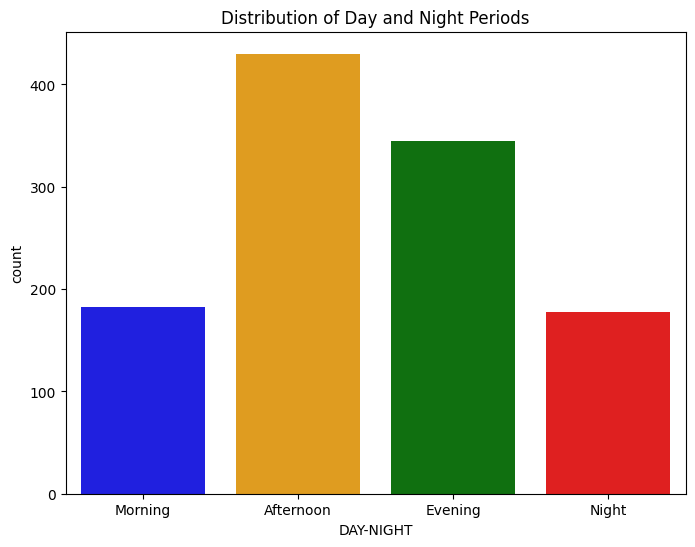

In [29]:
#Here we will be using the DAY-NIGHT column which we have extracted above.
# Example custom colors
custom_colors = ['Blue', 'orange','green','red'] 

# Create a figure
plt.figure(figsize=(8, 6))
sns.countplot(x='DAY-NIGHT', data=df, palette=custom_colors)
plt.title("Distribution of Day and Night Periods")

## **Category & Purpose**

C:\Users\shaik\AppData\Local\Temp\ipykernel_17288\904408649.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CATEGORY',data=df, palette=category_colors)
C:\Users\shaik\AppData\Local\Temp\ipykernel_17288\904408649.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PURPOSE', data=df, palette=purpose_colors)
C:\Users\shaik\AppData\Local\Temp\ipykernel_17288\904408649.py:14: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='PURPOSE', data=df, palette=purpose_colors)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

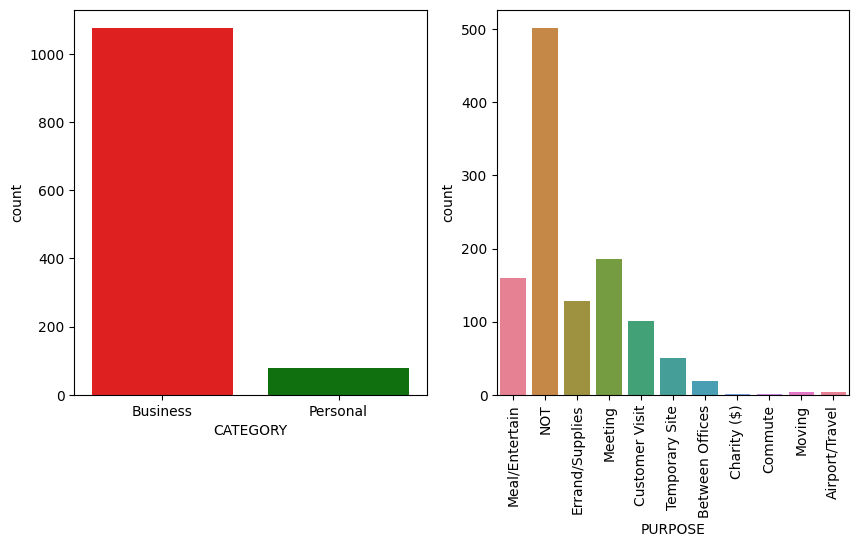

In [30]:
# Create a figure with a specific size
plt.figure(figsize=(10,5))

# Define custom color palettes
category_colors = ['red', 'green']  # Example colors for the CATEGORY plot
purpose_colors = sns.color_palette('husl', 10)  # Use a Seaborn palette for PURPOSE

# First subplot: CATEGORY with custom colors
plt.subplot(1,2,1)
sns.countplot(x='CATEGORY',data=df, palette=category_colors)
 
# Second subplot: PURPOSE with custom colors
plt.subplot(1,2,2)
sns.countplot(x='PURPOSE', data=df, palette=purpose_colors)
plt.xticks(rotation=90)

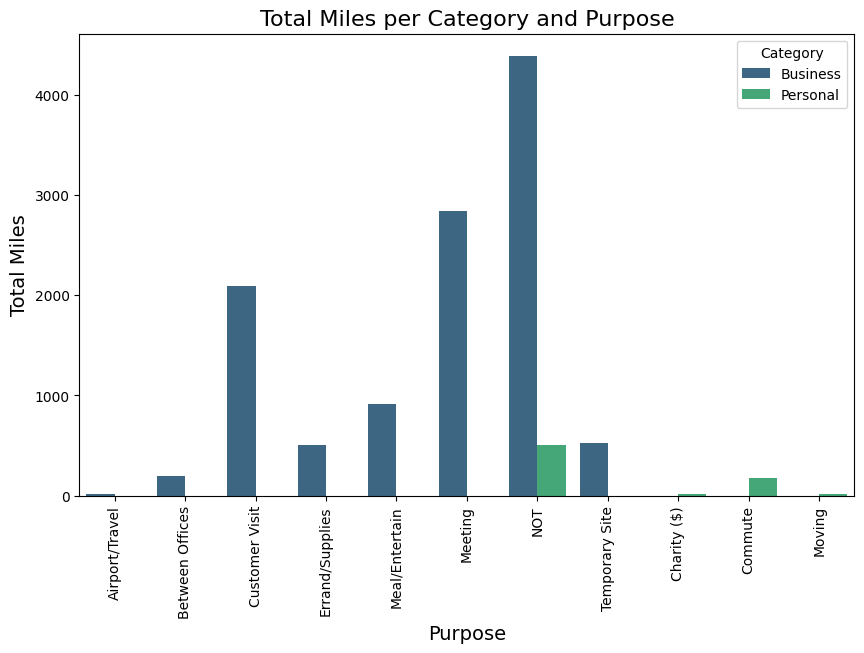

In [31]:
# Aggregate the data by CATEGORY and PURPOSE
total_mile = df.groupby(['CATEGORY', 'PURPOSE']).agg(total_miles=('MILES', 'sum')).reset_index()

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the data using seaborn's barplot for better visualization
sns.barplot(data=total_mile, x='PURPOSE', y='total_miles', hue='CATEGORY', palette='viridis')

# Adding labels and title
plt.title('Total Miles per Category and Purpose', fontsize=16)
plt.ylabel('Total Miles', fontsize=14)
plt.xlabel('Purpose', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Category')

## **How long do people travel with UBER?**

Text(0, 0.5, 'Travel distance')

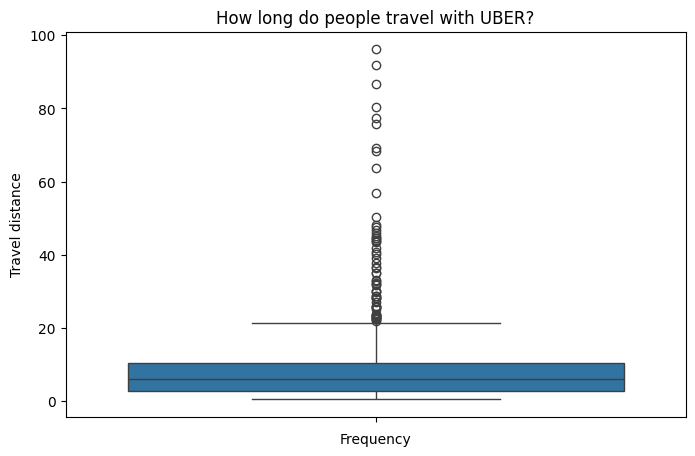

In [32]:
# Creating the box plot
plt.figure(figsize = (8, 5))
sns.boxplot(df[df['MILES']<100]['MILES'])

# Adding labels and title
plt.title('How long do people travel with UBER?')
plt.xlabel('Frequency')
plt.ylabel('Travel distance')

## **Pickup places**

C:\Users\shaik\AppData\Local\Temp\ipykernel_17288\3751349025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=start_boarding.index,y=start_boarding.values, palette= 'rainbow')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Karchi'),
  Text(9, 0, 'Apex'),
  Text(10, 0, 'Westpark Place'),
  Text(11, 0, 'Rawalpindi'),
  Text(12, 0, 'Berkeley'),
  Text(13, 0, 'Midtown'),
  Text(14, 0, 'Kissimmee'),
  Text(15, 0, 'Kenner'),
  Text(16, 0, 'New Orleans'),
  Text(17, 0, 'Emeryville'),
  Text(18, 0, 'Downtown'),
  Text(19, 0, 'San Francisco')])

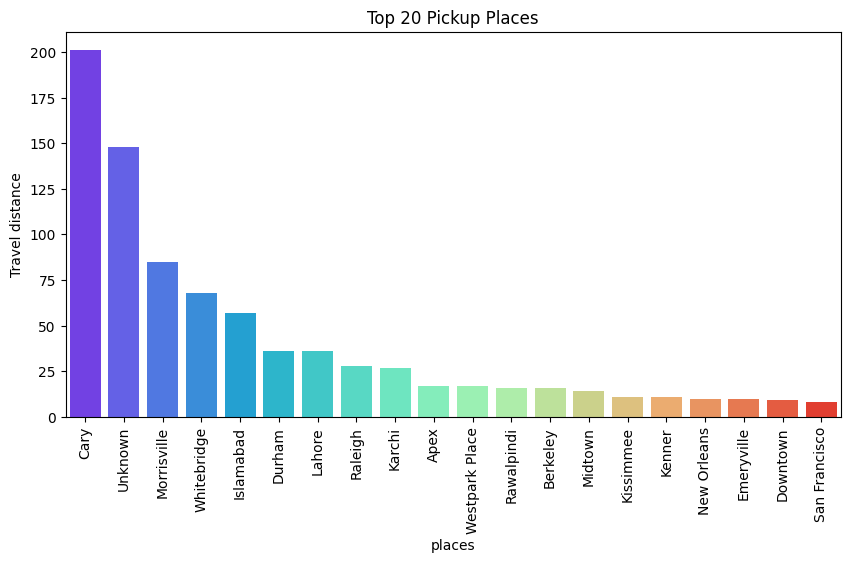

In [33]:
start_boarding=df['START'].value_counts()[:20]

# Plotting the bar chart
plt.figure(figsize = (10, 5))
sns.barplot(x=start_boarding.index,y=start_boarding.values, palette= 'rainbow')

# Adding labels
plt.xlabel('places')
plt.title('Top 20 Pickup Places')
plt.ylabel('Travel distance')
plt.xticks(rotation = 90)

## **Drop Places**

Text(0.5, 1.0, 'Top 10 Drop Places')

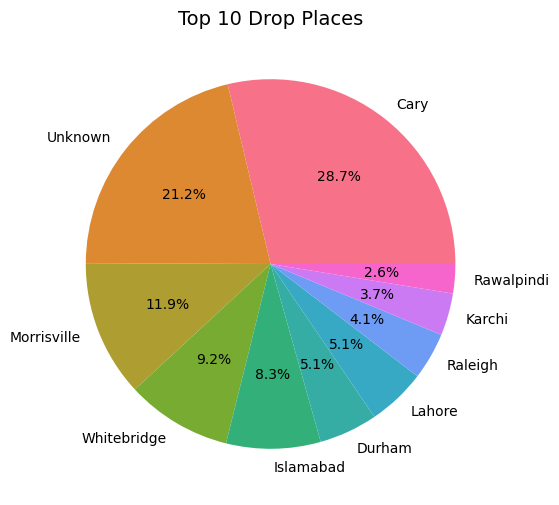

In [34]:
# Get the top 10 drop places
top_stop_places = df['STOP'].value_counts(ascending=False)[:10]

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_stop_places, labels=top_stop_places.index, autopct='%1.1f%%', colors=sns.color_palette('husl', len(top_stop_places)))

# Adding labels and title
plt.title('Top 10 Drop Places', fontsize=14)

## **Round Trip**

In [35]:
def is_roundtrip(df):
    if df['START'] == df['STOP']:
        return 'YES'
    else:
        return 'NO'
  
# Adding ROUND_TRIP column in the dataframe
df['ROUND_TRIP'] = df.apply(is_roundtrip, axis = 1) # axis = 1 means it is for column
df['ROUND_TRIP'].value_counts()

ROUND_TRIP
NO     866
YES    288
Name: count, dtype: int64

In [36]:
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,COUNTRY,DATE,HOUR,DAY-NIGHT,ROUND_TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,USA,2016-01-01,21,Night,YES
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,USA,2016-01-02,1,Morning,YES
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,USA,2016-01-02,20,Night,YES


C:\Users\shaik\AppData\Local\Temp\ipykernel_17288\336844926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=round_trip_counts.index, y=round_trip_counts.values, palette='viridis')


Text(0, 0.5, 'Count')

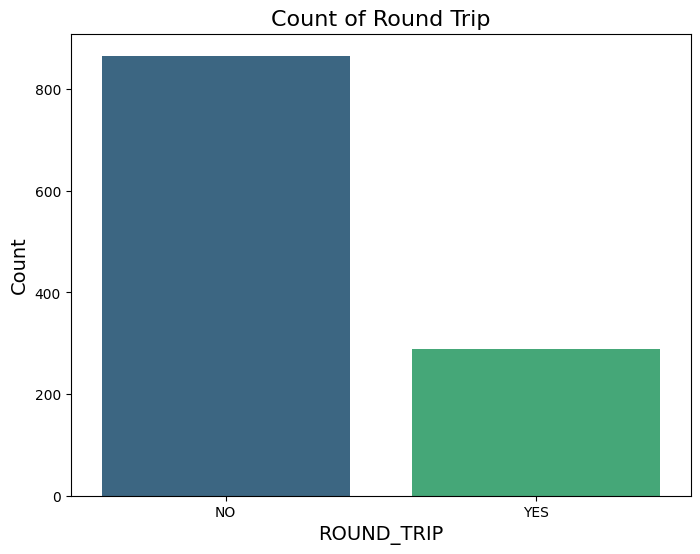

In [37]:
# Count the occurrences of each category in the 'ROUND_TRIP' column
round_trip_counts = df['ROUND_TRIP'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=round_trip_counts.index, y=round_trip_counts.values, palette='viridis')

# Adding labels and title
plt.title('Count of Round Trip', fontsize=16)
plt.xlabel('ROUND_TRIP', fontsize=14)
plt.ylabel('Count', fontsize=14)

Text(0, 0.5, 'Trips')

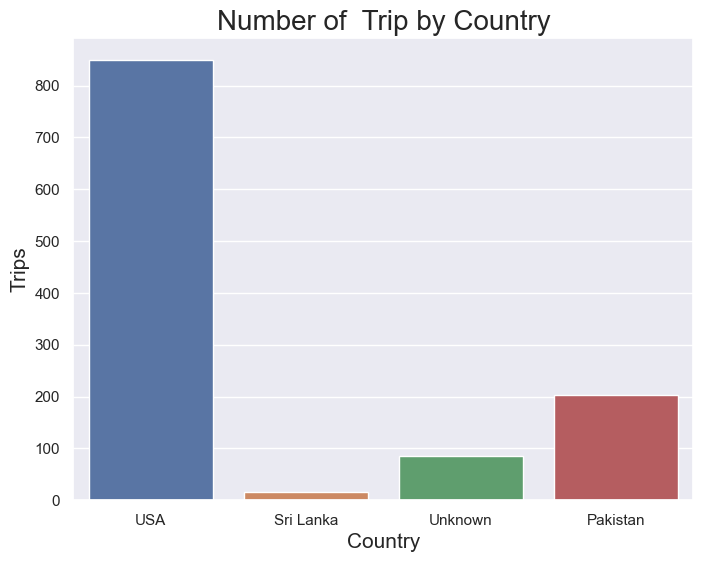

In [45]:
# Plot the number of trips per country
# Set the figure size for better readability
plt.figure(figsize=(8, 6))

sns.set(rc={'figure.figsize': (15,9)})
ax = sns.countplot(x='COUNTRY', data= df, hue='COUNTRY')

# Adding labels and title
plt.title("Number of  Trip by Country", fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Trips', fontsize=15)

In [39]:
# extracting and adding columns related to date and time that we might need
day = []
dayofweek = []
month = []
weekday = []

for x in df['START_DATE']:
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
df['DAY'] = day
df['DAY OF WEEK'] = dayofweek
df['MONTH'] = month
df['WEEKDAY'] = weekday

In [40]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,COUNTRY,DATE,HOUR,DAY-NIGHT,ROUND_TRIP,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,USA,2016-01-01,21,Night,YES,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,USA,2016-01-02,1,Morning,YES,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,USA,2016-01-02,20,Night,YES,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,USA,2016-01-05,17,Evening,YES,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,USA,2016-01-06,14,Afternoon,NO,6,2,1,Wednesday


### **What hour do most people take UBER to their Destination?**

Text(0.5, 1.0, 'Number of Trips Vs Hours')

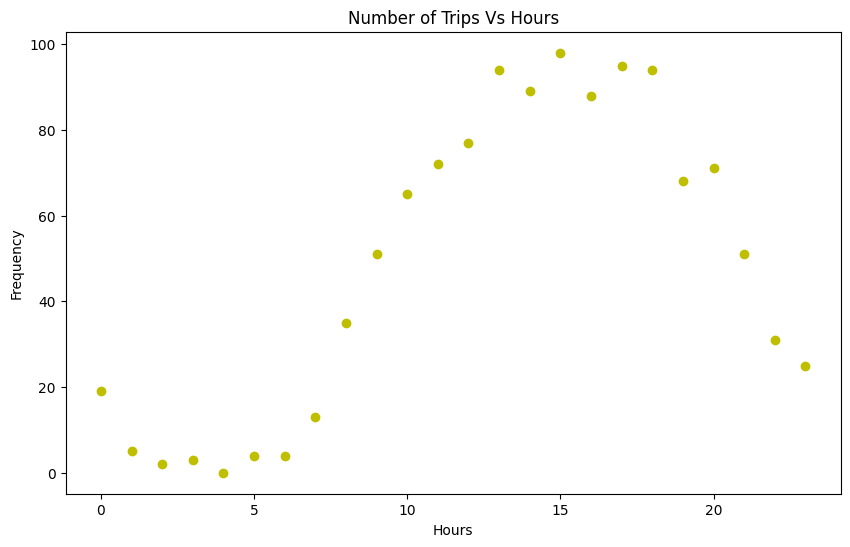

In [41]:
hours = df['START_DATE'].dt.hour.value_counts().sort_values(ascending=False)

# Ensure all 24 hours are included in the plot
all_hours = pd.Series(0, index=range(24))
all_hours.update(hours)
hours = all_hours.sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.scatter(hours.index,hours.values, color='y')

# Adding labels and title
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips Vs Hours')

### **Which day has the highest Number of Trips**

Text(0.5, 1.0, 'Number of Trips VS Weekday')

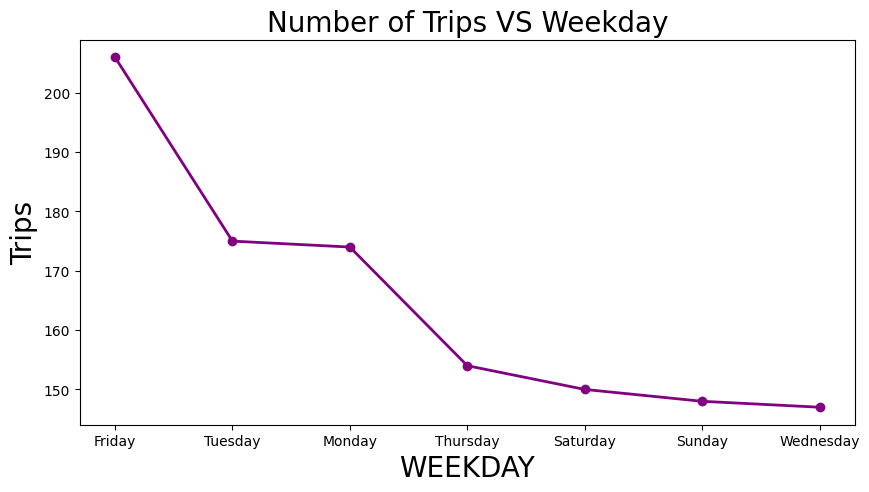

In [42]:
weekday=df['WEEKDAY'].value_counts()
# Plotting the bar chart
plt.figure(figsize = (10, 5))
plt.plot(weekday.index, weekday.values, marker='o', color='purple', linestyle='-', linewidth=2)

# Adding labels
plt.xlabel('WEEKDAY', fontsize=20)
plt.ylabel('Trips', fontsize=20)
plt.title('Number of Trips VS Weekday', fontsize=20)

### **Number of Trips per Day**

Text(0.5, 1.0, 'Number of Trips per Day')

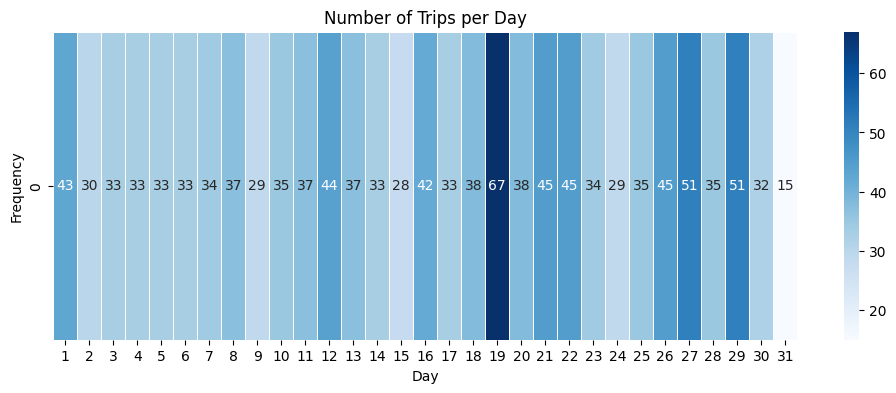

In [43]:
#'day' contains counts for each day of the month
day = df['DAY'].value_counts().reindex(range(1, 32), fill_value=0)

# Create a DataFrame suitable for heatmap plotting
heatmap_data = pd.DataFrame(day.values.reshape(1, -1), columns=day.index)

# Plotting the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, cbar=True, linewidths=0.5)

# Adding labels and title
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Number of Trips per Day')

### **Which month has the highest no. of trip?**

C:\Users\shaik\AppData\Local\Temp\ipykernel_17288\4200108604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='MONTH', data= df, palette= 'rainbow')


Text(0.5, 1.0, 'Number of Trips every month')

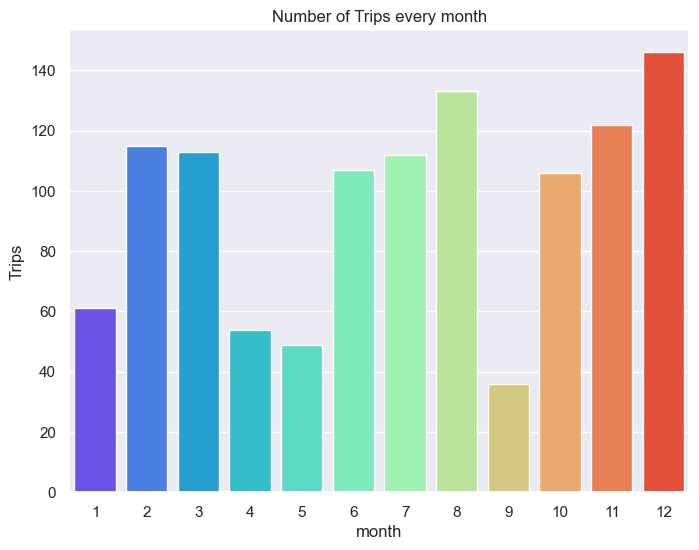

In [44]:
sns.set(rc={'figure.figsize': (8, 6)})
ax = sns.countplot(x='MONTH', data= df, palette= 'rainbow')

# Adding labels
plt.xlabel('month')
plt.ylabel('Trips')
plt.title('Number of Trips every month')

### **Conclusion**
Around 94% miles was consumed during Business trips.
Only 6% miles were consumed during personal trips.

Most of the rider is for Meeting Purpose.

Most people book a ride for short distance, like for 1-50 miles.

People Start Boarding Their Trip from most is Cary

Most of the trip is one-way. Only 25% is round-trip.

Most of the Trips is at 1:00 PM, 3:00 PM, 5:00 PM, then 6:00 PM. 

FRIDAY has the most number of Trip.

December receive the highest booking.

### **Recommendations**
**One-Way Trips Focus:** Since most trips are one-way, Uber can create targeted marketing campaigns that emphasize the convenience of one-way trips, especially for short distances.

**Time-Specific Promotions:** Given that most trips occur around 1:00 PM, 2:00 PM, 3:00 PM, and 5:00 PM, Uber could introduce time-specific discounts or promotions during these peak hours to attract more customers and maximize vehicle utilization.

**Meeting-Related Offers:** Since "Meeting" is the most common trip purpose, Uber can collaborate with businesses or office complexes to offer discounts for rides to and from meetings, or promote an "Uber for Business" package that includes these perks.

**High-Booking Locations:** Focus marketing efforts and service improvements in high-demand areas such as Cary, where most trips start. This could involve increased vehicle availability or special promotions for residents in these areas.

**Friday Specials:** With Friday being the day with the highest number of trips, Uber could offer special weekend discounts starting from Friday or create Friday-specific campaigns, such as "Friday Fares," to capitalize on this trend.

**December Promotions:** Since December sees the highest bookings, Uber should plan ahead for increased demand. This could include offering holiday season promotions, bundling rides with festive events, or launching campaigns that emphasize Uber's reliability during the busy holiday season.

**Short-Distance Ride Focus:** Since the majority of trips are short-distance (1-50 miles), Uber could introduce or promote services like UberX Share or other cost-effective ride options that cater specifically to short distances. This would appeal to cost-conscious users and increase the overall number of rides.

**Meeting-Specific Services:** Uber could introduce a "Meeting Mode" option where users can schedule pickups around their meeting schedules, ensuring timely arrivals and departures. Additionally, offer bundled services for frequent travelers who attend multiple meetings in a day.